In [ ]:
%%html
<style type='text/css'>
    .CodeMirror{
        font-size: 18px;
</style>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

print(pd.__version__)
print(sns.__version__)

1.5.2
0.12.2


# Phần 3. `FacetGrid và PairGrid`

In [2]:
# Magic command để không cần gọi hàm plt.show()
%matplotlib inline

In [3]:
tip_df = sns.load_dataset('tips')
tip_df.columns = ['Tổng đơn', 'Tip', 'Giới tính', 'Hút thuốc', 'Ngày', 'Thời điểm', 'Số lượng']
tip_df 

,Tổng đơn,Tip,Giới tính,Hút thuốc,Ngày,Thời điểm,Số lượng
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# 1. FacetGrid

## 1.1. Tạo nhiều biểu đồ con cùng lúc bằng `FacetGrid()`

**Tự động tạo các biểu đồ con theo phân loại**

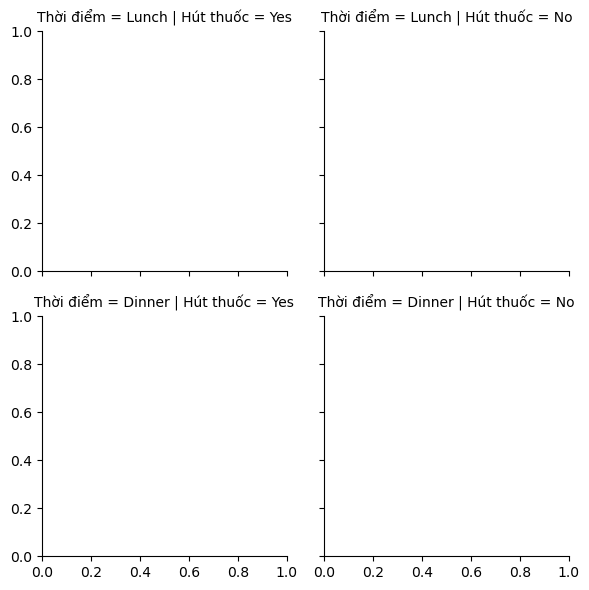

In [4]:
sns.FacetGrid(data=tip_df,
             col='Hút thuốc',
             row='Thời điểm',
             height=3)

plt.show()

**Sử dụng hàm `map` để đổ dữ liệu lên biểu đồ**

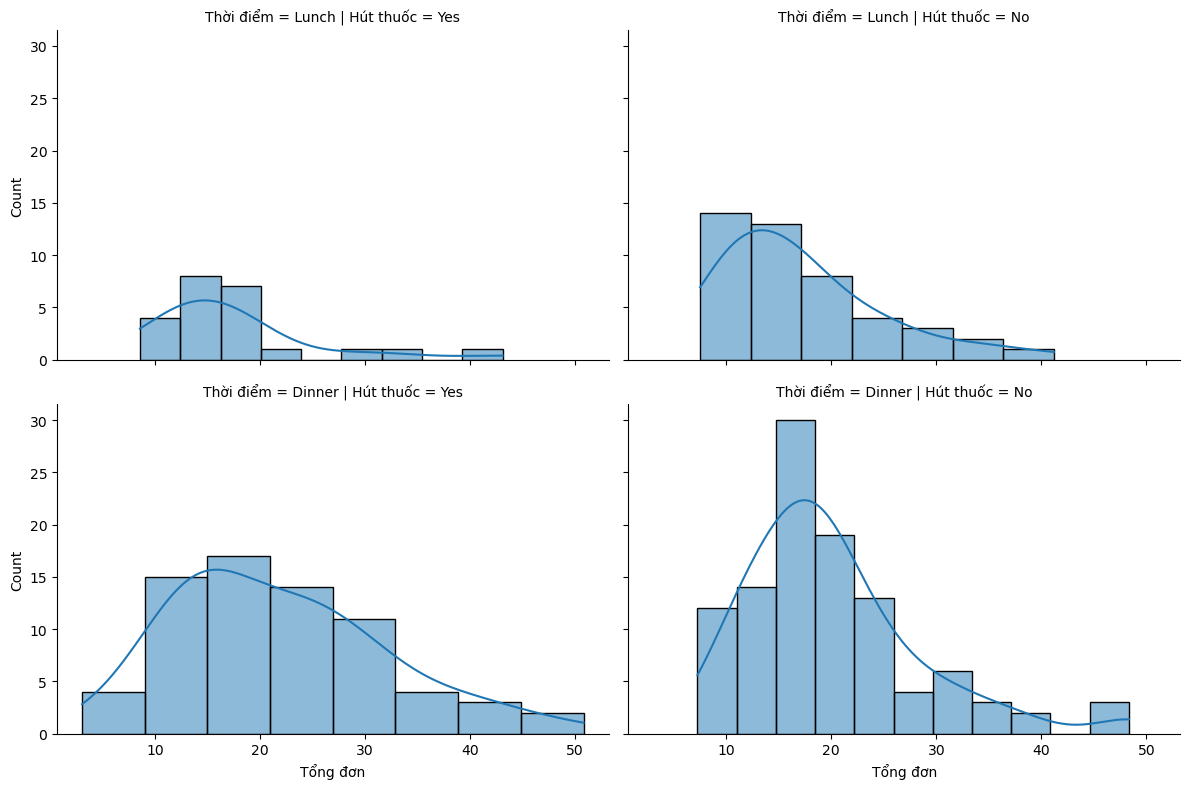

In [6]:
# Vẽ phân bố giá trị của 'Tổng đơn'
bieudo1 = sns.FacetGrid(tip_df, col='Hút thuốc', row='Thời điểm', height=4, aspect=1.5)

bieudo1.map(sns.histplot,'Tổng đơn', kde=True)

plt.tight_layout()

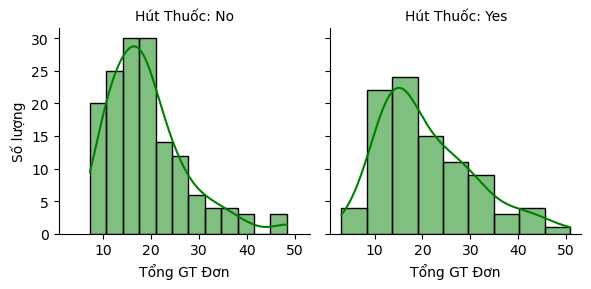

In [7]:
# Nếu chỉ muốn xem xét cột "Hút thuốc"
bieudo1 = sns.FacetGrid(tip_df, 
                        col='Hút thuốc',
                        col_order=['No', 'Yes']
                       )
bieudo1.map(sns.histplot, 'Tổng đơn', color='green', kde=True)

bieudo1.set_axis_labels('Tổng GT Đơn', 'Số lượng')
bieudo1.set_titles('Hút Thuốc: {col_name}')
plt.show()

**Chia lưới theo ngày**

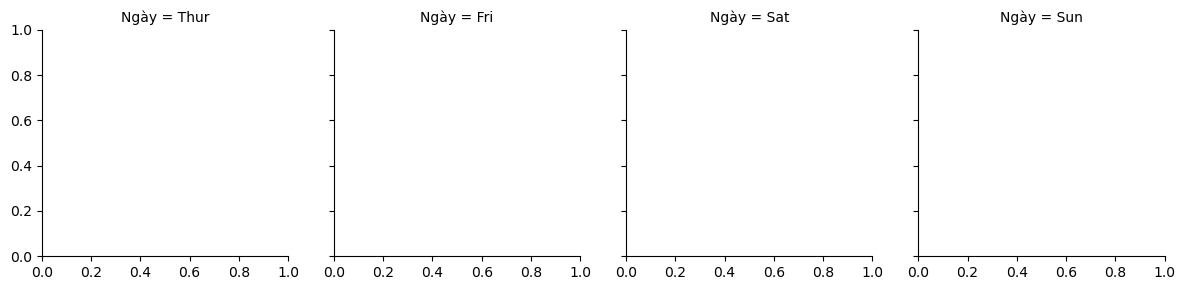

In [8]:
sns.FacetGrid(tip_df, col='Ngày')

plt.show()

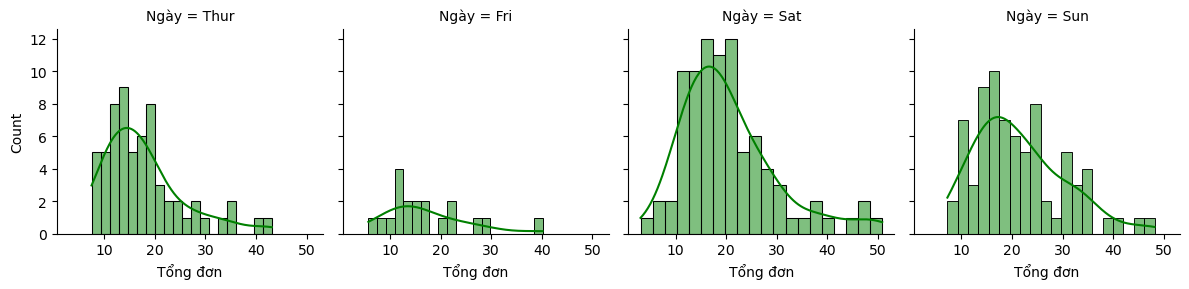

In [9]:
bieudo1 = sns.FacetGrid(tip_df, col='Ngày', col_wrap=4)
bieudo1.map(sns.histplot, 'Tổng đơn', color='green', bins=20, kde=True)
plt.show()

**Mapping cho scatterplot**

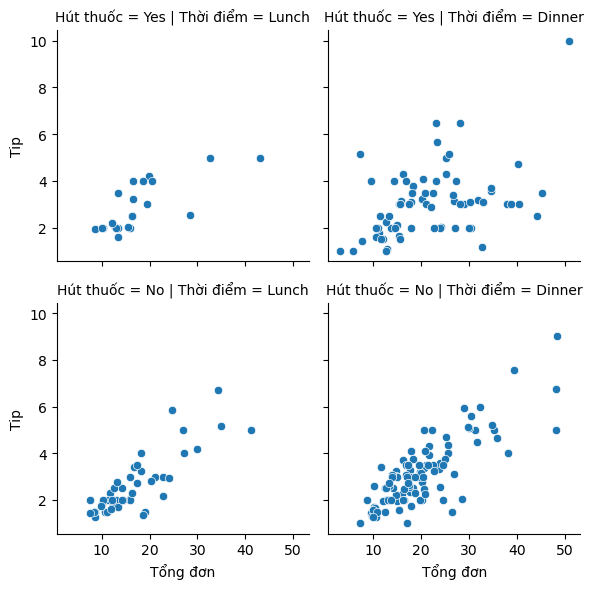

In [10]:
# Vẽ biểu đồ scatter
# fig = plt.figure(figsize=(7,7))
bieudo2 = sns.FacetGrid(tip_df, col='Thời điểm', row='Hút thuốc', 
                        height=3, aspect=1)
bieudo2.map(sns.scatterplot,'Tổng đơn','Tip')

plt.tight_layout()

<font color='red'>**Tuy nhiên, hàm `map()` chưa được chuẩn hóa, nếu muốn thêm `size` sẽ KHÔNG thực hiện được**</font>

ValueError: Could not interpret value `Số lượng` for parameter `size`

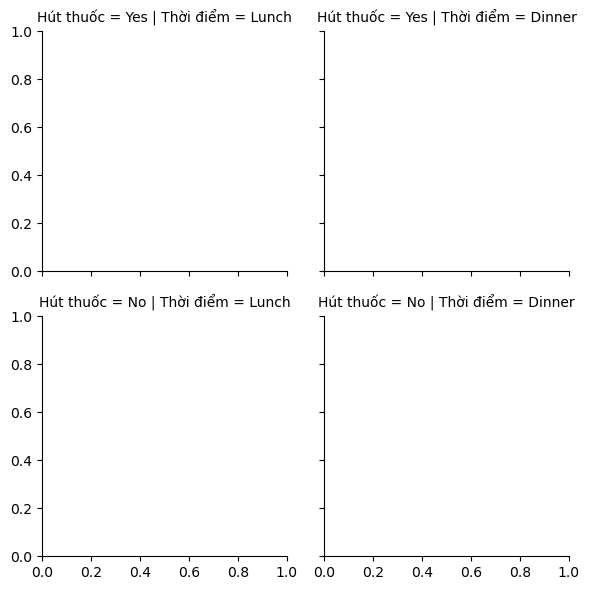

In [11]:
bieudo2 = sns.FacetGrid(tip_df, col='Thời điểm', row='Hút thuốc')
bieudo2.map(sns.scatterplot, 'Tổng đơn', 'Tip', color='green', size='Số lượng')

<font color='red'>**==> Cần dùng hàm `map_dataframe()` để đưa thêm thông tin**</font>

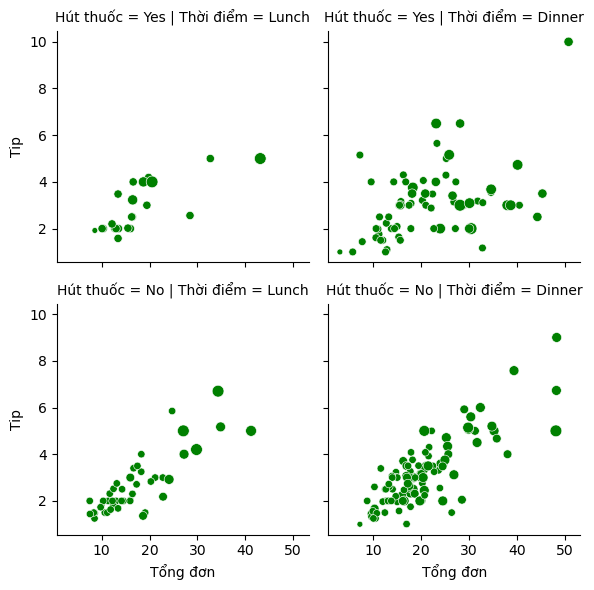

In [12]:
bieudo2 = sns.FacetGrid(tip_df, col='Thời điểm', row='Hút thuốc', height=3)
bieudo2.map_dataframe(sns.scatterplot, 'Tổng đơn', 'Tip', color='green', 
                      size='Số lượng')
plt.show()

## 1.2. Tạo FacetGrid bằng các hàm Figure-Level

Set các tham số 'col' và 'row' trong các hàm vẽ từ Figure-Level

**Thay vì phải map hàm `sns.scatter()` ==> sử dụng hàm `sns.relplot()` để tạo grid**
</br>
<font color='red'>**==> Set 2 tham số: `col` và `row`**</font>

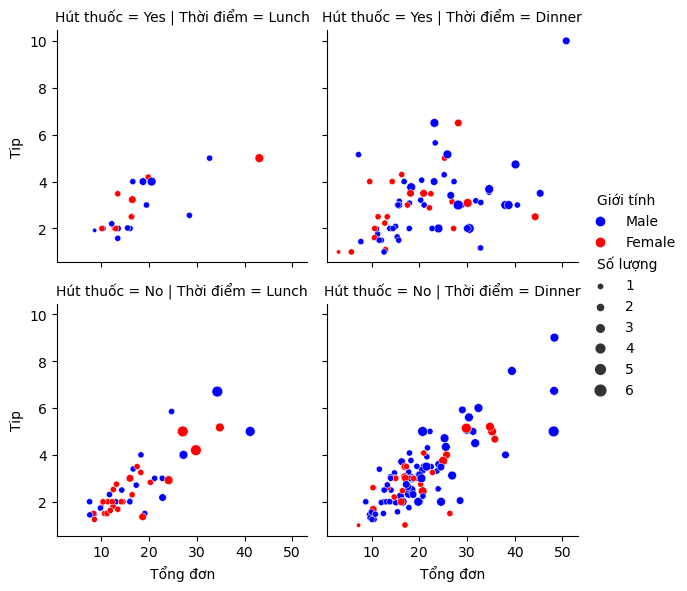

In [15]:
sns.relplot(data=tip_df, height=3,
            x="Tổng đơn", y="Tip",
            
            size="Số lượng",
            sizes=(10, 60), # min và max của size ở trên ('Số lượng')
            col='Thời điểm', row='Hút thuốc',
            
            hue="Giới tính", # style="Giới tính",
            palette=["b", "r"], 
)

**Sử dụng hàm `sns.displot()` để tạo grid các histogram**

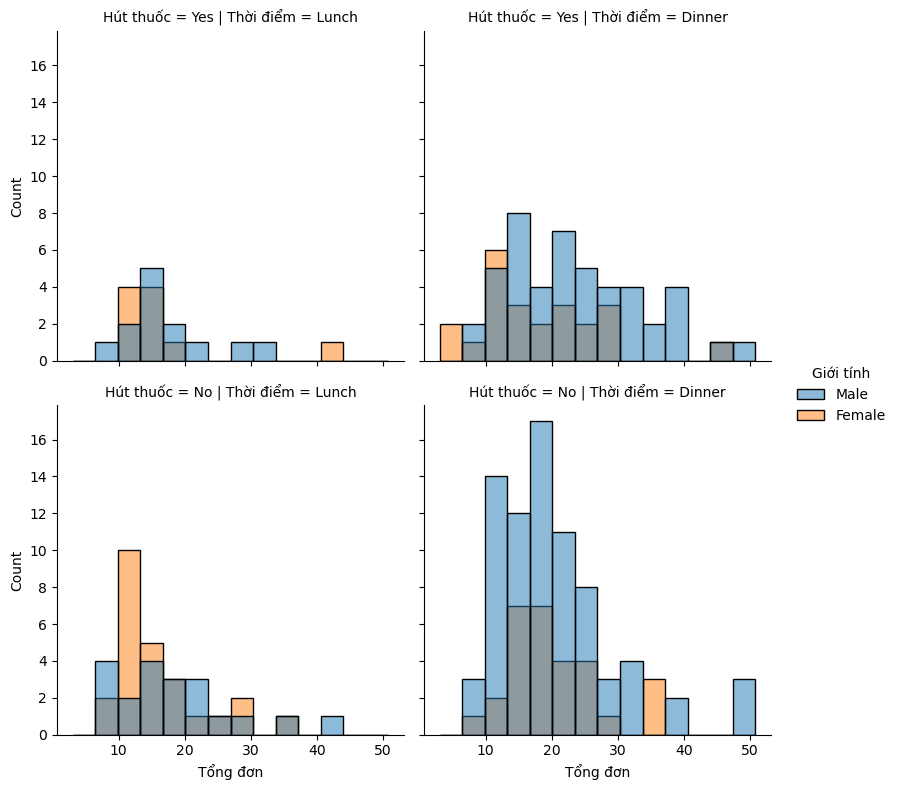

In [16]:
sns.displot(height=4,
            data=tip_df, x="Tổng đơn", 
            col="Thời điểm", row='Hút thuốc', # FacetGrid
            hue="Giới tính",
)
plt.show()

# 2. PairPlot

**PairPlot cơ bản**

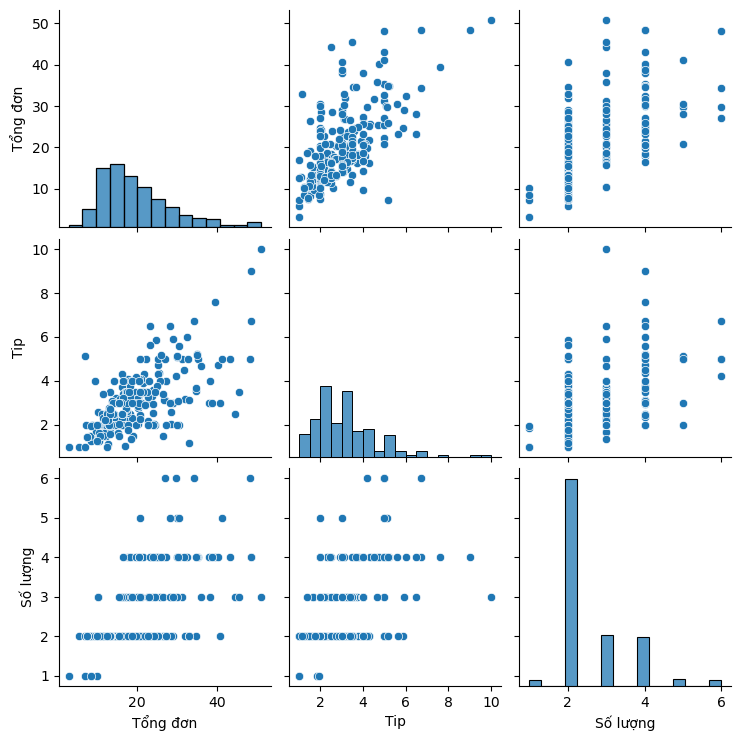

In [26]:
sns.pairplot(tip_df)

plt.show()

**Một số chỉnh sửa nâng cao**

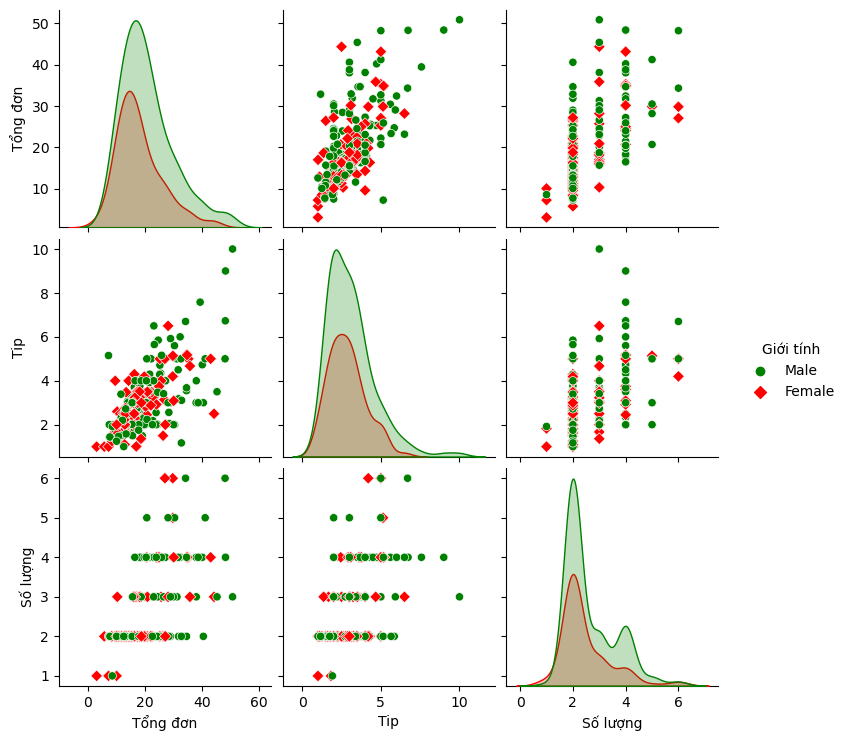

In [17]:
# Chia loại theo một cột nào đó: 'Giới tính'
bieudo = sns.pairplot(tip_df, hue='Giới tính', 
                      markers=['o', 'D'], 
                      palette=['green', 'red'])

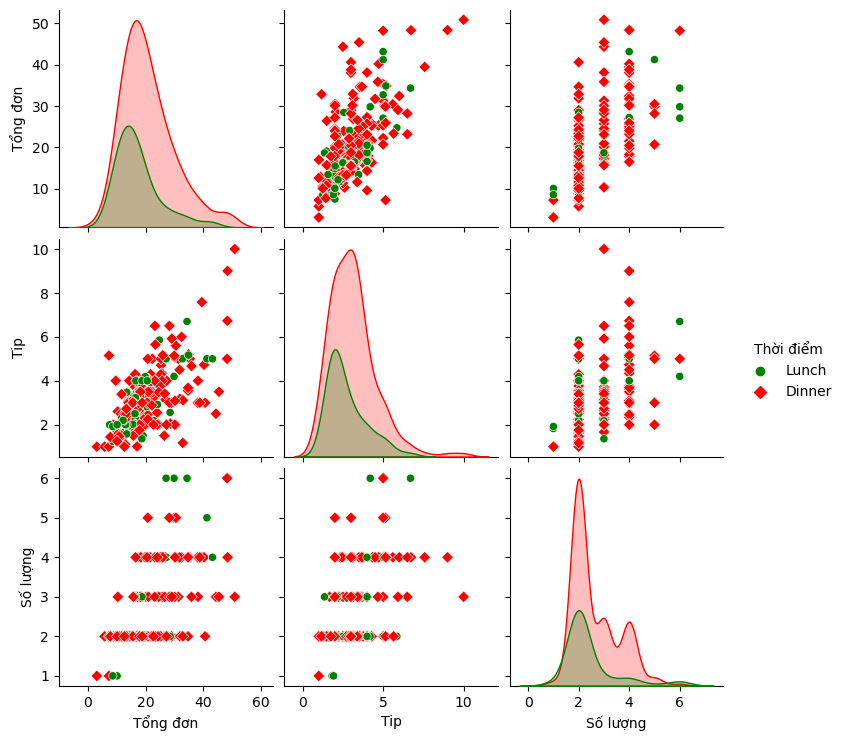

In [18]:
# Chia loại theo một cột nào đó: 'Thời điểm'
bieudo = sns.pairplot(tip_df, hue='Thời điểm', 
                      markers=['o', 'D'], 
                      palette=['green', 'red'])

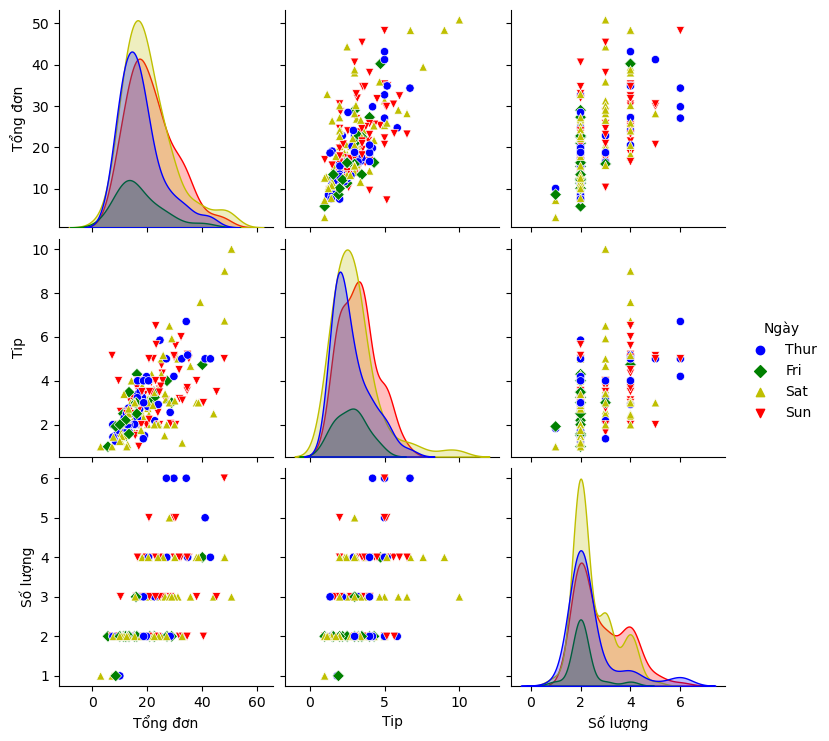

In [19]:
# Chia loại theo một cột nào đó: 'Ngày'
bieudo = sns.pairplot(tip_df, hue='Ngày', 
                      markers=['o','D','^','v'], 
                      palette=['b','g','y','r'])

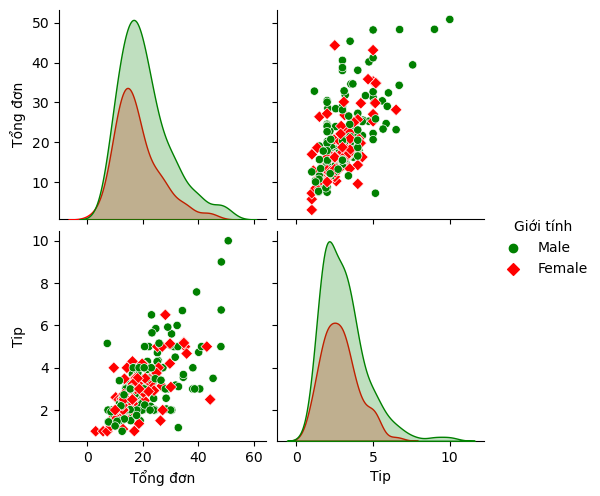

In [20]:
# Chọn một số cột: ['Tổng đơn', 'Tip']
bieudo = sns.pairplot(tip_df, 
                      vars=['Tổng đơn', 'Tip'], 
                      hue='Giới tính', 
                      markers=['o', 'D'], 
                      palette=['green', 'red'])

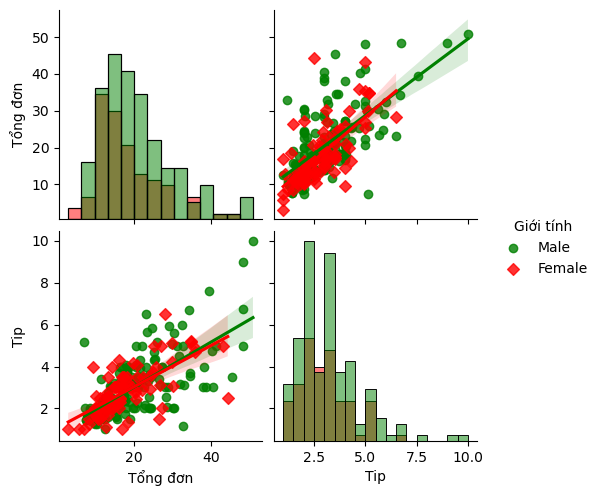

In [21]:
# Thay đổi hiển thị của các biểu đồ đường chéo và phần còn lại
bieudo = sns.pairplot(tip_df, 
                      vars=['Tổng đơn', 'Tip'],
                      kind='reg',
                      hue='Giới tính', markers=['o', 'D'], 
                      palette=['green', 'red'],
                      diag_kind='hist',
                     )

# 3. PairGrid

Giống như PairPlot, nhưng cho phép mapping các loại biểu đồ lên grid

## 3.1. Tạo PairGrid

In [ ]:
???
grid1.map(???)

plt.show()

**Chọn một số cột bằng tham số `vars`**

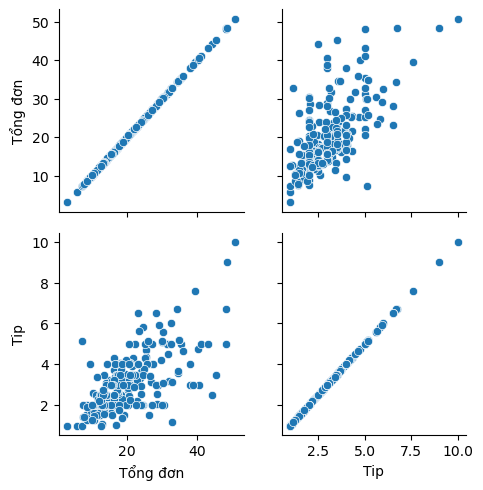

In [22]:
grid1 = sns.PairGrid(tip_df, 
                     vars=['Tổng đơn', 'Tip']
                    )
grid1.map(sns.scatterplot)

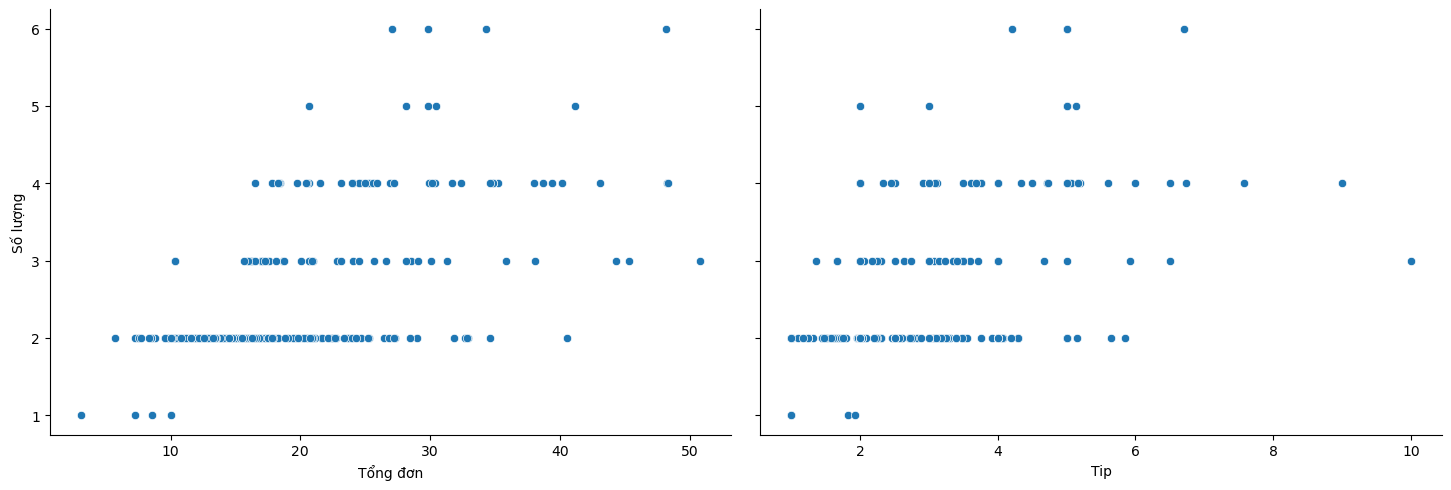

In [23]:
# Dùng x_vars và y_vars
grid1 = sns.PairGrid(tip_df,
                     x_vars=['Tổng đơn', 'Tip'],
                     y_vars=['Số lượng'],
                     height=5, aspect=1.5
                    )
grid1.map(sns.scatterplot)

## 3.2. Chọn các loại biểu đồ khác nhau

**Sử dụng hàm `.map_diag()` và `.map_offdiag()`**

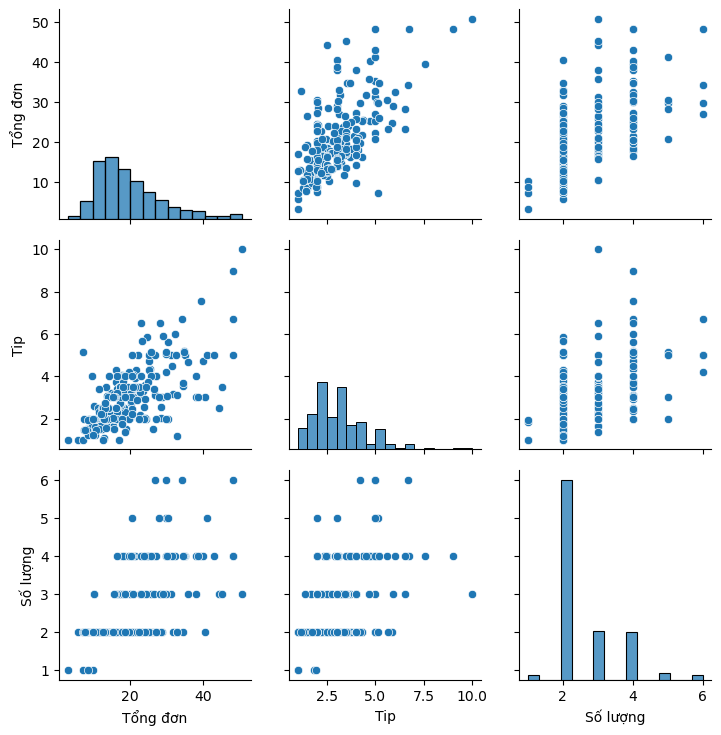

In [24]:
grid1 = sns.PairGrid(tip_df)

# Trên đường chéo chính
grid1.map_diag(sns.histplot)

# Ngoài đường chéo chính
grid1.map_offdiag(sns.scatterplot)

plt.show()

**Sử dụng hàm `.map_upper()` và `.map_lower()`**

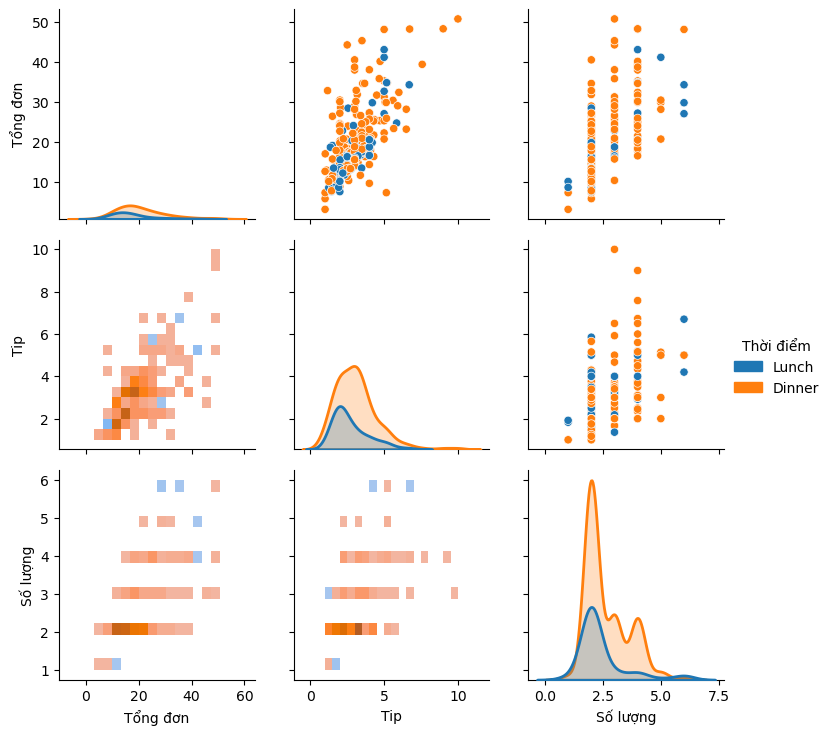

In [25]:
grid1 = sns.PairGrid(tip_df, corner=False, hue='Thời điểm')

# Phần bên trên đường chéo chính
grid1.map_upper(sns.scatterplot)

# Đường chéo chính
grid1.map_diag(sns.kdeplot, fill=True, lw=2)

# Phần bên dưới đường chéo chính
grid1.map_lower(sns.histplot)

grid1.add_legend()